### Практическая работа 2.

В этой работе будем использовать датасет для классификации - определять, есть у пациента рак груди или нет. В этом датасете все признаки категориальные.

Делайте те шаги задания, которые можете. Задание устроено так, что можно пропускать некоторые шаги и при этом делать следующие. 

In [1]:
from __future__ import division
from __future__ import print_function

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

from matplotlib import pylab as plt
%pylab inline

from sklearn.manifold import TSNE

import os
import sys
from time import time

import warnings

warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from scipy.io import loadmat

from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA as PCA1

from pyod.utils.utility import standardizer
from pyod.utils.utility import precision_n_scores
from sklearn.metrics import roc_auc_score

from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


C:\Users\elena\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
df = pd.read_csv("breast-cancer.data",header=None)

## Шаг 1.

Выведите на экран первые 5 строк таблицы. Последняя (9я) колонка - целевая переменная.

Также выведите на экран количество строк с ответом "no" и количество строк с ответом "yes".

In [3]:
#your code here
df.head()

,0,1,2,3,4,5,6,7,8,9
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


### Шаг 2.
Попытайтесь дать интерпретации тому, что содержится в колонках. Запишите словами, что по вашему мнению может содержаться в каждой колонке.

In [5]:
#your interpretation here

### Шаг 3.
Используйте get_dummies для кодирования столбцов 2, 5, 6, 8.

In [7]:
#your code here
df = pd.get_dummies(df, columns=[2,5,6,8])

In [8]:
df.head()

,0,1,3,4,7,9,2_ge40,2_lt40,2_premeno,5_?,...,5_yes,6_1,6_2,6_3,8_?,8_central,8_left_low,8_left_up,8_right_low,8_right_up
0,no-recurrence-events,30-39,30-34,0-2,left,no,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,no-recurrence-events,40-49,20-24,0-2,right,no,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,no-recurrence-events,40-49,20-24,0-2,left,no,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,no-recurrence-events,60-69,15-19,0-2,right,no,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,no-recurrence-events,40-49,0-4,0-2,right,no,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


### Шаг 4.

Колонки 0, 7 и 9 содержат по два категориальных значения. Закодируйте их 0 и 1.
Например, в столбце 9 стоят 'yes' и 'no'. Замените 'yes' на 1, а 'no' на 0. Аналогично поступите с колонками 0 и 7.

In [11]:
#your code here
df[0] = df[0].map({'no-recurrence-events': 0, 'recurrence-events': 1})
df[7] = df[7].map({'left': 0, 'right': 1})
df[9] = df[9].map({'no': 0, 'yes': 1})

### Шаг 5. 
Столбцы 1, 3 и 4 содержат несколько категорий. Закодируйте их вручную. Например, в столбце 4 категорию '0-2' замените на 0, '3-5' на 1, '6-8' на 2 и т.д. Аналогично поступите с колонками 1 и 3.

In [24]:
#your code here

def map_4(x):
    if x == '0-2':
        return 0
    if x == '3-5':
        return 1
    if x == '6-8':
        return 2
    if x == '9-11':
        return 3
    if x == '12-14':
        return 4
    if x == '15-17':
        return 5
    return 6

df[4] = df[4].apply(map_4)   
df[4]

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
256    0
257    1
258    2
259    1
260    1
261    4
262    0
263    0
264    0
265    3
266    1
267    6
268    0
269    0
270    2
271    0
272    0
273    0
274    1
275    3
276    2
277    2
278    5
279    2
280    2
281    0
282    0
283    0
284    1
285    1
Name: 4, Length: 286, dtype: int64

In [25]:
#your code here
def map_3(x):
    if x == '0-4':
        return 0
    if x == '5-9':
        return 1
    if x == '10-14':
        return 2
    if x == '15-19':
        return 3
    if x == '20-24':
        return 4
    if x == '25-29':
        return 5
    if x == '30-34':
        return 6
    if x == '35-39':
        return 7
    if x == '40-44':
        return 8
    if x == '45-49':
        return 9
    return 10

df[3] = df[3].apply(map_3)   
df[3]

0       6
1       4
2       4
3       3
4       0
5       3
6       5
7       4
8      10
9       4
10      0
11      5
12      2
13      5
14      6
15      6
16      3
17      6
18      6
19      6
20      8
21      3
22      5
23      8
24      7
25      5
26      4
27      5
28      8
29      6
       ..
256     6
257     4
258     6
259     6
260     5
261     5
262     5
263     4
264     4
265     7
266     6
267     4
268     7
269     5
270     6
271     5
272     3
273     6
274     6
275     5
276     5
277     2
278     7
279     8
280     8
281     6
282     4
283     4
284     6
285     6
Name: 3, Length: 286, dtype: int64

In [26]:
#your code here
def map_1(x):
    if x == '20-29':
        return 0
    if x == '30-39':
        return 1
    if x == '40-49':
        return 2
    if x == '50-59':
        return 3
    if x == '60-69':
        return 4
    return 5

df[1] = df[1].apply(map_1)   
df[1]

0      1
1      2
2      2
3      4
4      2
5      4
6      3
7      4
8      2
9      2
10     2
11     3
12     4
13     3
14     2
15     4
16     2
17     3
18     4
19     3
20     3
21     4
22     1
23     3
24     3
25     2
26     3
27     4
28     2
29     4
      ..
256    2
257    2
258    3
259    3
260    4
261    2
262    4
263    3
264    3
265    1
266    2
267    4
268    1
269    2
270    3
271    3
272    2
273    4
274    4
275    2
276    1
277    4
278    3
279    3
280    3
281    1
282    1
283    4
284    2
285    3
Name: 1, Length: 286, dtype: int64

### Проверка
выведите на экран таблицу с измененными колонками и проверьте, что в ней остались только числовые столбцы. Если нет, удалите нечисловые столбцы. 

In [27]:
#your code here
df.head()

,0,1,3,4,7,9,2_ge40,2_lt40,2_premeno,5_?,...,5_yes,6_1,6_2,6_3,8_?,8_central,8_left_low,8_left_up,8_right_low,8_right_up
0,0,1,6,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,2,4,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0,2,4,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,0,4,3,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,2,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


### Шаг 6.
Колонка 9 содержит целевую переменную. Создайте матрицу X объект-признак, содержащую все столбцы, кроме 9, и целевой вектор y, содержащий столбец 9.

In [28]:
#your code here
X = df.drop(9, axis=1)
y = df[9]

X.shape, y.shape

((286, 20), (286,))

### Шаг 7.
Выведите качество логистической регрессии на кросс-валидации с тремя фолдами, метрика качества - accuracy. Также выведите качество на кросс-валидации SVM с а) линейным (kernel=linear), б) полиномиальным (poly), в) радиальным (rbf) ядрами. Какой алгоритм дает наилучшее качество?

In [29]:
#your code here
print(cross_val_score(LogisticRegression(), X, y, cv=3, scoring='accuracy').mean())
print(cross_val_score(SVC(kernel='linear'), X, y, cv=3, scoring='accuracy').mean())
print(cross_val_score(SVC(kernel='rbf'), X, y, cv=3, scoring='accuracy').mean())
print(cross_val_score(SVC(kernel='poly'), X, y, cv=3, scoring='accuracy').mean())

0.6382239952718677
0.6310579196217494
0.7268026004728133
0.6736849881796689


### Шаг 8.
Попробуем удалить выбросы. Предположим, что в данных содержится 10% выбросов. В цикле примените алгоритм поиска выбросов и оставьте только объекты, не являющиеся выбросами. В этом же цикле выведите качество наилучшего алгоритма из предыдущего шага на кросс-валидации (используйте матрицу X_wo_out и вектор y_wo_out без выбросов).

Какой алгоритм поиска выбросов работает на этих данных лучше всего?

In [33]:
from pyod.models.pca import PCA

outliers_fraction = 0.1
random_state = 1

classifiers = {'Cluster-based Local Outlier Factor': CBLOF(
        contamination=outliers_fraction, check_estimator=False,
        random_state=random_state),
    'Feature Bagging': FeatureBagging(contamination=outliers_fraction,
                                     random_state=random_state),
    'Histogram-base Outlier Detection (HBOS)': HBOS(
        contamination=outliers_fraction),
    'Isolation Forest': IForest(contamination=outliers_fraction,
                                random_state=random_state),
    'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
    'Local Outlier Factor (LOF)': LOF(
        contamination=outliers_fraction),
    'Minimum Covariance Determinant (MCD)': MCD(
        contamination=outliers_fraction, random_state=random_state),
    'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
    'Principal Component Analysis (PCA)': PCA1(
        contamination=outliers_fraction, random_state=random_state),
}

for clf_name, clf in classifiers.items():
    clf.fit(X)
    y_pred = clf.labels_
    
    X_wo_out = X[y_pred == 0]
    y_wo_out = y[y_pred == 0]
    
    print(clf_name,' ',cross_val_score(SVC(kernel='rbf'),X_wo_out,y_wo_out,cv=3,\
                         scoring='accuracy').mean())
    #your code here

Cluster-based Local Outlier Factor   0.7509127789046653
Feature Bagging   0.7625170998632012
Histogram-base Outlier Detection (HBOS)   0.7858641130870954
Isolation Forest   0.7976288189694483
K Nearest Neighbors (KNN)   0.7633228840125392
Local Outlier Factor (LOF)   0.7625873337840883
Minimum Covariance Determinant (MCD)   0.7859364435429343
One-class SVM (OCSVM)   0.750843593251254
Principal Component Analysis (PCA)   0.7703403200360605


### Шаг 9.
Теперь снизим размерность. Создайте пайплайн, в котором сначала примените PCA с 5-ю компонентами, а затем алгоритм, который лучше всего сработал в шаге 7. 

Выведите качество этой модели (пайплайна) на кросс-валидации. Используйте исходные данные (X, y) до удаления выбросов.

In [35]:
#your code here
from sklearn.decomposition import PCA

pipe = Pipeline([('pca', PCA(n_components=5)),\
                 ('model', SVC(kernel='rbf'))])

cross_val_score(pipe, X, y, cv=3, scoring='accuracy').mean()

0.7515514184397163

### Шаг 10.
Мы увидели, что и удаление выбросов, и снижение размерности увеличивает качество модели, поэтому скомбинируем шаги 8 и 9:
    сначала удалите выбросы наилучшим алгоритмом из шага 8, а затем примените модель (пайплайн) из шага 9.
    
Выведите качество на кросс-валидации.

In [36]:
#your code here
clf = IForest(contamination=outliers_fraction,
                                random_state=random_state)
clf.fit(X)
y_pred = clf.labels_

X_wo_out = X[y_pred == 0]
y_wo_out = y[y_pred == 0]

cross_val_score(pipe, X_wo_out, y_wo_out, cv=3, scoring='accuracy').mean()

0.7977200182398541

### Шаг 11.
Теперь попробуем кластеризовать наши данные (X) с помощью KMeans. Выделите в данных 2 кластера. Нарисуйте полученные точки на плоскости и раскрасьте их в цвета, соответствующие кластерам.

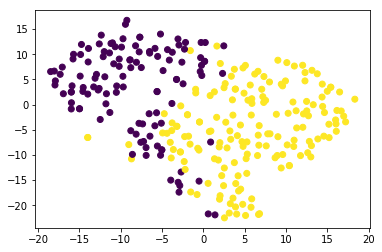

In [39]:
#your code here
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit(X)

tsne = TSNE(n_components=2)
Xtsne = tsne.fit_transform(X)

plt.scatter(Xtsne[:,0], Xtsne[:,1], c=km.labels_)

### Шаг 12.
Разберемся, что означают кластеры:

1) Нарисуйте на плоскости точки, где первая координата - признак 1, вторая - признак 3 (что это за признаки по смыслу?) и раскрасьте точки в цвета, соответствующие кластерам.
    
2) Теперь нарисуйте точки в координатах, соответствующих 1му и 7му признаку.
    
Сделайте вывод о том, какие по смыслу объекты попали в первый кластер и во второй.

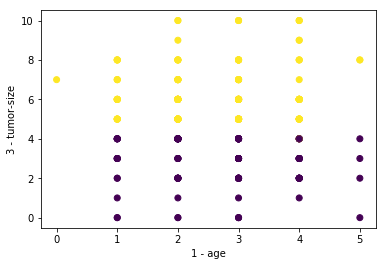

In [40]:
#your code here
plt.scatter(X[1], X[3], c=km.labels_)
plt.xlabel('1 - age')
plt.ylabel('3 - tumor-size')
plt.show()

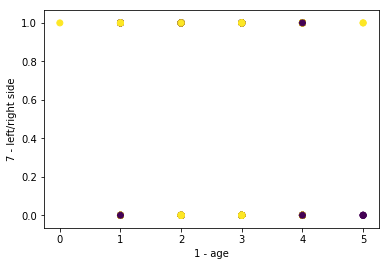

In [41]:
#your code here
plt.scatter(X[1], X[7], c=km.labels_)
plt.xlabel('1 - age')
plt.ylabel('7 - left/right side')
plt.show()